In [1]:
import pandas as pd
import numpy as np
import os
from PIL import Image
import image_processing

<h2>Margonem</h2>

1. Get images from directory tree
2. Drop images with wrong resolution
3. Crop the data needed
4. Standarize background
5. Ensure the RGBA/RGB format
6. Save the first frame to new directory as .png

In [2]:
MARGONEM_PATH = './raw/margonem'
MARGONEM_EXTENSIONS = ('png', 'gif')
MARGONEM_CROP_BOX = (0, 0, 32, 48)
MARGONEM_MODE = 'RGBA'
MARGONEM_DEST_PATH = './processed/margonem'

In [3]:
paths = image_processing.get_all_files(MARGONEM_PATH, allowed_extensions=MARGONEM_EXTENSIONS)

In [4]:
n_files = len(paths)
n_files_existing = sum([len(files) for _, _, files in os.walk(MARGONEM_PATH)])
print(f'Acquired {n_files} out of {n_files_existing} files')

Acquired 4019 out of 4019 files


In [5]:
images = image_processing.get_images(paths)
len(images)

4019

In [6]:
images[0].size

(128, 192)

In [7]:
images = [img.crop(MARGONEM_CROP_BOX) for img in images]
images[0].size

(32, 48)

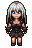

In [8]:
images[0]

In [9]:
images[0].mode

'RGBA'

In [10]:
new_images = []
for img in images:
    if img.mode != MARGONEM_MODE:
        img = img.convert(MARGONEM_MODE)
    new_images.append(img)

In [11]:
if not os.path.exists(MARGONEM_DEST_PATH):
    os.makedirs(MARGONEM_DEST_PATH)

for i, img in enumerate(new_images):
    img.save(os.path.join(MARGONEM_DEST_PATH, f'{i}.png'))

<h2>Pokemon</h2>

In [74]:
POKEMON_PATH = './raw/pokemon'
POKEMON_EXTENSIONS = ('png', 'gif')
POKEMON_MODE = 'RGBA'
POKEMON_DEST_PATH = './processed/pokemon'
POKEMON_BANNED_KEYWORDS = ['back']
POKEMON_REQUIRED_KEYWORDS=['transparent']
POKEMON_BANNED_KEYWORDS2 = ['back', 'versions']
POKEMON_REQUIRED_RES = (96, 96)
POKEMON_FINAL_RES = (128, 128)
POKEMON_BACKGROUND_COLOR = 255

In [63]:
paths, skipped = image_processing.get_all_files(POKEMON_PATH, allowed_extensions=POKEMON_EXTENSIONS,
                                                banned_keywords=POKEMON_BANNED_KEYWORDS,
                                                required_keywords=POKEMON_REQUIRED_KEYWORDS,
                                                get_skipped_files=True, get_wrong_extensions=True)
paths2, skipped2 = image_processing.get_all_files(POKEMON_PATH, allowed_extensions=POKEMON_EXTENSIONS,
                                                  banned_keywords=POKEMON_BANNED_KEYWORDS2,
                                                  get_skipped_files=True, get_wrong_extensions=True)
paths = paths + paths2

In [64]:
n_files = len(paths)
n_files_existing = sum([len(files) for _, _, files in os.walk(POKEMON_PATH)])
print(f'Acquired {n_files} out of {n_files_existing} files')

Acquired 6112 out of 41807 files


In [65]:
skipped_ext = [p[-4:] for p in skipped]
skipped_ext = np.unique(skipped_ext)
skipped_ext

array(['.gif', '.png', '.svg'], dtype='<U4')

In [66]:
images = image_processing.get_images(paths)
len(images)

Error trying to open: ./raw/pokemon\10180.png


6111

In [67]:
len([img for img in images if img.size == POKEMON_REQUIRED_RES])

3516

In [68]:
len([img for img in images if img.size[0] == img.size[1]])

6058

In [70]:
new_images = []
for img in images:
    if img.mode != POKEMON_MODE:
        img = img.convert(POKEMON_MODE)
    new_images.append(img)

In [75]:
if POKEMON_REQUIRED_RES is not None:
    resized_images = [np.array(img) for img in new_images if img.size == POKEMON_REQUIRED_RES]
    resized_images = np.stack(resized_images, axis=0)
    padding = (POKEMON_FINAL_RES[0] - POKEMON_REQUIRED_RES[0] / 2, 
              POKEMON_FINAL_RES[1] - POKEMON_REQUIRED_RES[1] / 2)
    resized_images = np.pad(img, ((0, 0), padding, padding, (0, 0)),
                            mode='constant', constant_values=POKEMON_BACKGROUND_COLOR)
    print(resized_images.shape)
else:
    print(len(images))

TypeError: `pad_width` must be of integral type.

In [60]:
len(images)

0

In [50]:
images = np.array(images)
images.shape

<ipython-input-50-1aeedb4632c8>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  images = np.array(images)


ValueError: could not broadcast input array from shape (96,96,4) into shape (96,96)

In [19]:
if not os.path.exists(POKEMON_DEST_PATH):
    os.makedirs(POKEMON_DEST_PATH)

for i, img in enumerate(new_images):
    img.save(os.path.join(POKEMON_DEST_PATH, f'{i}.png'))

<h2>Heroes 3</h2>

In [1]:
HOMM3_PATH = './homm3_jednostki'
HOMM3_EXTENSIONS = ('png', 'gif')

In [5]:
paths = image_processing.get_all_files(HOMM3_PATH, allowed_extensions=HOMM3_EXTENSIONS)

In [6]:
len(paths)

156

In [7]:
images = image_processing.get_images(paths)
len(images)

156

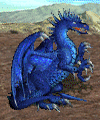

In [22]:
[img.resize((100, 120)) for img in images if img.size != (100, 120)][0]

In [37]:
new_images = []
for img in images:
    if img.size != (100, 120):
        img = img.resize((100, 120))
    if img.mode != 'RGB':
        img = img.convert('RGB')
    
    img = np.array(img)
    img = np.pad(img, ((4, 4), (14, 14), (0, 0)), mode='linear_ramp')   
    
    new_images.append(img)

In [38]:
for i, img in enumerate(new_images):
    img = Image.fromarray(img)
    img.save(f'processed/homm3/{i}.png')

In [39]:
img.size

(128, 128)